In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
data = fetch_california_housing(as_frame=True)
df = data.frame  

print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
print(df.isnull().sum())  # Перевірка пропусків

df.fillna(df.mean(), inplace=True)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [7]:
duplicates = df.duplicated().sum()
print(f'Кількість дублікатів: {duplicates}')

if duplicates > 0:
    df = df.drop_duplicates()

Кількість дублікатів: 0


In [9]:
print(df.dtypes)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


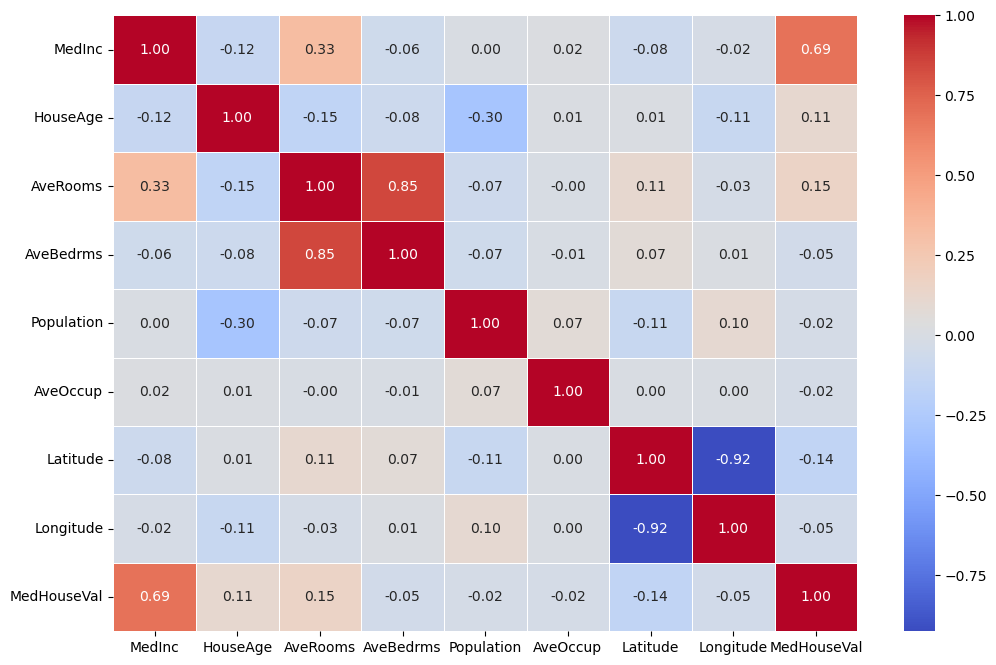

In [11]:
correlation = df.corr()['MedHouseVal'].sort_values(ascending=False)
print(correlation)

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [13]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

In [ ]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
rf_reg = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf_reg, rf_params, cv=3, scoring='r2')
grid_rf.fit(X_train, y_train)

print(f"Найкращі параметри RandomForest: {grid_rf.best_params_}")
y_pred_rf = grid_rf.predict(X_test)

In [ ]:
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, ridge_params, cv=3, scoring='r2')
grid_ridge.fit(X_train, y_train)

print(f"Найкращі параметри Ridge: {grid_ridge.best_params_}")
y_pred_ridge = grid_ridge.predict(X_test)

In [ ]:
print("Лінійна регресія:")
print(f"R^2: {r2_score(y_test, y_pred_lin):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lin):.2f}")


print("RandomForest регресія:")
print(f"R^2: {r2_score(y_test, y_pred_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")


print("Ridge регресія:")
print(f"R^2: {r2_score(y_test, y_pred_ridge):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.2f}")

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='Справжні значення', marker='o')
plt.plot(y_pred_rf[:50], label='Прогнозовані значення (RandomForest)', marker='x')
plt.title('Порівняння справжніх і прогнозованих значень')
plt.legend()
plt.show()


In [ ]:
results = pd.DataFrame({'Справжні значення': y_test, 'Прогнозовані значення (RF)': y_pred_rf})
print(results.head(10))